In [1]:
from tensorflow import keras

from keras.models import Sequential

from keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
from matplotlib import pyplot as plt

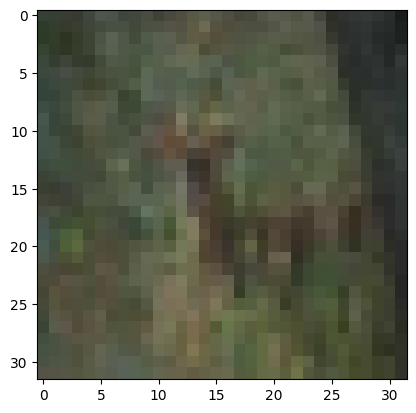

In [5]:
plt.imshow(x_train[10])

In [6]:
y_train[10]

array([4], dtype=uint8)

In [7]:
model=Sequential()

model.add(Conv2D(input_shape=(32,32,3),filters=96,kernel_size=11, strides=4, padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(3, 3), strides=2,padding='same'))


model.add(Conv2D(filters=256,kernel_size=5, strides=1, padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(3, 3), strides=2,padding='same'))

model.add(Conv2D(filters=384,kernel_size=3, strides=1, padding='same',activation='relu'))
model.add(Conv2D(filters=384,kernel_size=3, strides=1, padding='same',activation='relu'))

model.add(Conv2D(filters=256,kernel_size=3, strides=1, padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(3, 3), strides=2,padding='same'))

model.add(Flatten())

model.add(Dense(units=4096,activation="relu"))
model.add(Dropout(rate=0.30))
model.add(Dense(units=4096,activation="relu"))
model.add(Dropout(rate=0.30))

model.add(Dense(units=10,activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 8, 8, 96)          34944     
                                                                 
 max_pooling2d (MaxPooling2  (None, 4, 4, 96)          0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 4, 4, 256)         614656    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 2, 2, 256)         0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 2, 2, 384)         885120    
                                                                 
 conv2d_3 (Conv2D)           (None, 2, 2, 384)         1

In [8]:
model.compile(optimizer='sgd', loss="sparse_categorical_crossentropy", metrics="sparse_categorical_accuracy")

In [10]:
model_train=model.fit(x=x_train, y=y_train,epochs=10, verbose='auto',validation_data=(x_test,y_test))

Epoch 1/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.4839 - sparse_categorical_accuracy: 0.4653 - val_loss: 1.5676 - val_sparse_categorical_accuracy: 0.4371
Epoch 2/10
1563/1563 [==============================] - 18s 11ms/step - loss: 1.3704 - sparse_categorical_accuracy: 0.5075 - val_loss: 1.3652 - val_sparse_categorical_accuracy: 0.5139
Epoch 3/10
1563/1563 [==============================] - 18s 11ms/step - loss: 1.2781 - sparse_categorical_accuracy: 0.5480 - val_loss: 1.3548 - val_sparse_categorical_accuracy: 0.5154
Epoch 4/10
1563/1563 [==============================] - 18s 11ms/step - loss: 1.2020 - sparse_categorical_accuracy: 0.5732 - val_loss: 1.3855 - val_sparse_categorical_accuracy: 0.5128
Epoch 5/10
1563/1563 [==============================] - 22s 14ms/step - loss: 1.1260 - sparse_categorical_accuracy: 0.5990 - val_loss: 1.2647 - val_sparse_categorical_accuracy: 0.5514
Epoch 6/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.

In [ ]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.3026 - sparse_categorical_accuracy: 0.5469


[1.302646279335022, 0.5468999743461609]

In [ ]:
pred=model.predict(x_test)

313/313 [==============================] - 1s 3ms/step


In [ ]:
import numpy as np

In [ ]:
np.argmax(pred[0])

3

# Normalization

In [ ]:
x_train=x_train/255
x_test=x_test/255

In [ ]:
x_test[0]

array([[[0.61960784, 0.43921569, 0.19215686],
        [0.62352941, 0.43529412, 0.18431373],
        [0.64705882, 0.45490196, 0.2       ],
        ...,
        [0.5372549 , 0.37254902, 0.14117647],
        [0.49411765, 0.35686275, 0.14117647],
        [0.45490196, 0.33333333, 0.12941176]],

       [[0.59607843, 0.43921569, 0.2       ],
        [0.59215686, 0.43137255, 0.15686275],
        [0.62352941, 0.44705882, 0.17647059],
        ...,
        [0.53333333, 0.37254902, 0.12156863],
        [0.49019608, 0.35686275, 0.1254902 ],
        [0.46666667, 0.34509804, 0.13333333]],

       [[0.59215686, 0.43137255, 0.18431373],
        [0.59215686, 0.42745098, 0.12941176],
        [0.61960784, 0.43529412, 0.14117647],
        ...,
        [0.54509804, 0.38431373, 0.13333333],
        [0.50980392, 0.37254902, 0.13333333],
        [0.47058824, 0.34901961, 0.12941176]],

       ...,

       [[0.26666667, 0.48627451, 0.69411765],
        [0.16470588, 0.39215686, 0.58039216],
        [0.12156863, 0

In [ ]:
model_train_nor=model.fit(x=x_train, y=y_train,epochs=10, verbose='auto',validation_data=(x_test,y_test))

Epoch 1/10
1563/1563 [==============================] - 20s 12ms/step - loss: 1.5681 - sparse_categorical_accuracy: 0.4484 - val_loss: 1.2187 - val_sparse_categorical_accuracy: 0.5658
Epoch 2/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.0636 - sparse_categorical_accuracy: 0.6210 - val_loss: 1.1696 - val_sparse_categorical_accuracy: 0.5899
Epoch 3/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.9629 - sparse_categorical_accuracy: 0.6576 - val_loss: 1.1602 - val_sparse_categorical_accuracy: 0.5904
Epoch 4/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.8949 - sparse_categorical_accuracy: 0.6818 - val_loss: 1.1799 - val_sparse_categorical_accuracy: 0.5980
Epoch 5/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.8351 - sparse_categorical_accuracy: 0.7025 - val_loss: 1.1818 - val_sparse_categorical_accuracy: 0.5943
Epoch 6/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.